590it [00:06, 94.73it/s] 


t: -1.4142014543031356, p: 0.08152136163827074


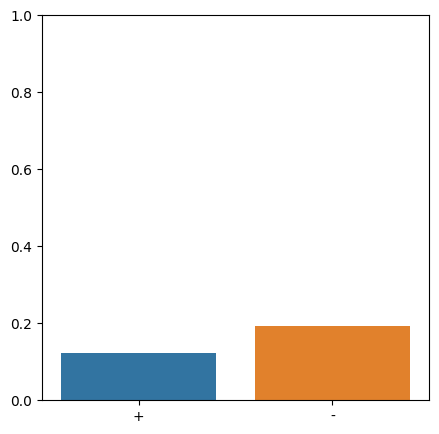

In [1]:
from lib.figure_6 import figure_6_poster_panel_d

figure_6_poster_panel_d(reset=False, mono=True)

100%|██████████| 29/29 [01:37<00:00,  3.35s/it]

t: -0.7120452040057363, p: 0.23969642885969655


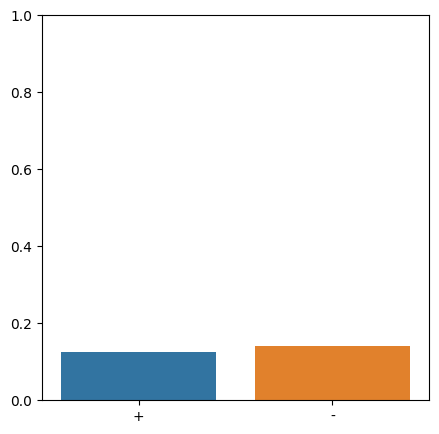

In [1]:
from lib.figure_6 import figure_6_poster_panel_d

figure_6_poster_panel_d(reset=False, mono=False)

100%|██████████| 29/29 [01:46<00:00,  3.67s/it]

(29, 101)
[-0.6114681  -0.24695857 -0.26630104 -0.37574458  0.18812783  0.16132501
  0.17103338  0.33077383  0.07080194  0.1044381   0.29371583  0.40011236
  0.3261658   0.5602402   0.51592094  0.80351573  0.951805    0.9297017
  1.071244    1.2687469   1.3936397   1.2370589   1.2224115   1.4633291
  1.5493478   1.5147903   1.3697093   1.2804104   1.3145422   1.5087619
  1.4256831   2.2723868   2.6158772   2.3738496   2.5180023   2.6923358
  2.5509331   2.767407    3.1809545   3.1824548   3.4079175   3.299469
  2.5176325   2.3176582   2.376863    2.1540635   2.1986806   2.4145653
  3.030957    3.0344007   3.3315601   2.955823    2.5673516   3.1515684
  3.8320813   3.8272524   4.05723     4.1599045   4.2345047   3.9237795
  3.7532492   3.3711934   3.443195    3.3988256   3.656706    3.695933
  4.0176587   3.4015567   3.3355055   3.0429132   2.958828    3.194253
  3.642902    3.5832891   3.505119    3.4796388   3.1678696   3.0183165
  3.198312    2.8470387   3.2147512   3.3406427   2.755

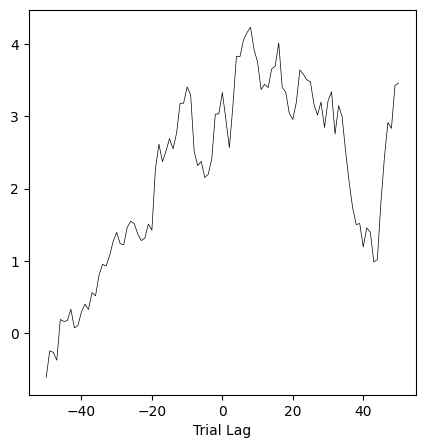

In [2]:
from lib.figure_6 import figure_6_poster_panel_f

figure_6_poster_panel_f(reset=False, mono=False)